In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
url = 'https://raw.githubusercontent.com/MIDS-at-Duke/unifying-data-science-final-project-pandemics-unemployment/master/data/unemployment_2016_2020.csv'
unemployment = pd.read_csv(url)
unemployment.head()

,State,Filed week ended,Initial Claims,Reflecting Week Ended,Continued Claims,Covered Employment,Insured Unemployment Rate
0,Alabama,1/2/16,"6,574",12/26/15,"26,579","1,816,714",1.46
1,Alabama,1/9/16,"8,151",1/2/16,"31,509","1,823,207",1.73
2,Alabama,1/16/16,"4,737",1/9/16,"25,695","1,823,207",1.41
3,Alabama,1/23/16,"3,226",1/16/16,"23,845","1,823,207",1.31
4,Alabama,1/30/16,"3,392",1/23/16,"24,259","1,823,207",1.33


In [85]:
#remove the comma in data and convert string to float
unemployment[['Initial Claims', 'Continued Claims', 'Covered Employment']] = unemployment[['Initial Claims', 'Continued Claims', 'Covered Employment']].apply(lambda x: x.str.replace(',','').apply(pd.to_numeric))

In [86]:
#convert date from string to date time
unemployment[['Filed week ended']] = unemployment[['Filed week ended']].apply(pd.to_datetime)

In [87]:
#filter the data from 2020-1-1 to the latest (2020-3-21)
unemployment=unemployment.loc[unemployment['Filed week ended'] >= '2020-01-01',:]

In [88]:
max(unemployment['Filed week ended'])

Timestamp('2020-03-21 00:00:00')

In [3]:
url = 'https://raw.githubusercontent.com/MIDS-at-Duke/unifying-data-science-final-project-pandemics-unemployment/master/data/effective_dates.csv'
order_date = pd.read_csv(url)
order_date.head()

,state,effective_date,order_in_place
0,Alabama,2020-04-04,1
1,Alaska,2020-03-28,1
2,Arizona,2020-03-31,1
3,Arkansas,NaN,0
4,California,2020-03-19,1


In [91]:
df = unemployment.pivot(index='Filed week ended', columns='State', values='Continued Claims')

In [92]:
df.dropna(axis = 0, how = 'all', inplace = True)
df.dropna(axis = 1, how = 'all', inplace = True)

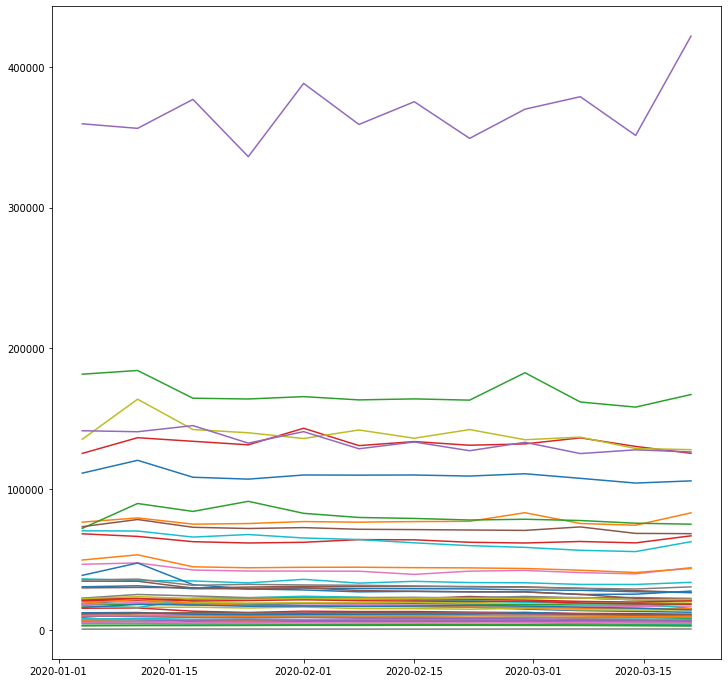

In [93]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot(111)
ax.plot(df)
plt.show()